In [1]:
library(rafalib)
library(dplyr)


Присоединяю пакет: 'dplyr'


Следующие объекты скрыты от 'package:stats':

    filter, lag


Следующие объекты скрыты от 'package:base':

    intersect, setdiff, setequal, union




In [2]:
dat<-read.csv("18_cardio_train.csv",sep = ";")
head(dat)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,18393,2,168,62,110,80,1,1,0,0,1,0
2,1,20228,1,156,85,140,90,3,1,0,0,1,1
3,2,18857,1,165,64,130,70,3,1,0,0,0,1
4,3,17623,2,169,82,150,100,1,1,0,0,1,1
5,4,17474,1,156,56,100,60,1,1,0,0,0,0
6,8,21914,1,151,67,120,80,2,2,0,0,0,0


In [3]:
print(dim(dat))
print(str(dat))

[1] 70000    13
'data.frame':	70000 obs. of  13 variables:
 $ id         : int  0 1 2 3 4 8 9 12 13 14 ...
 $ age        : int  18393 20228 18857 17623 17474 21914 22113 22584 17668 19834 ...
 $ gender     : int  2 1 1 2 1 1 1 2 1 1 ...
 $ height     : int  168 156 165 169 156 151 157 178 158 164 ...
 $ weight     : num  62 85 64 82 56 67 93 95 71 68 ...
 $ ap_hi      : int  110 140 130 150 100 120 130 130 110 110 ...
 $ ap_lo      : int  80 90 70 100 60 80 80 90 70 60 ...
 $ cholesterol: int  1 3 3 1 1 2 3 3 1 1 ...
 $ gluc       : int  1 1 1 1 1 2 1 3 1 1 ...
 $ smoke      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ alco       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ active     : int  1 1 0 1 0 0 1 1 1 0 ...
 $ cardio     : int  0 1 1 1 0 0 0 1 0 0 ...
NULL


In [4]:
?dplyr.mutate

In [5]:
print(dat$age/365)

    [1] 50.39178 55.41918 51.66301 48.28219 47.87397 60.03836 60.58356 61.87397
    [9] 48.40548 54.33973 61.72603 51.54795 40.52329 54.27123 39.81370 45.97808
   [17] 58.34521 45.88219 47.89589 59.60274 54.18630 58.66575 63.13973 64.04384
   [25] 45.50137 39.59726 53.58630 49.54795 39.92877 57.69041 50.11233 63.52329
   [33] 40.01370 56.58082 60.10959 55.90137 50.21370 49.24932 64.07671 49.66027
   [41] 54.37808 50.06575 58.83562 56.31781 54.14795 47.86575 49.88219 50.78082
   [49] 46.20274 43.95890 49.96712 50.24110 53.63014 39.74521 53.91507 59.69041
   [57] 47.69041 62.32329 43.56438 55.97534 52.34247 57.42466 55.69863 61.88219
   [65] 56.57260 59.59452 52.46027 60.54521 54.07945 57.21096 64.62740 59.92877
   [73] 64.20000 60.09315 43.94247 56.12055 55.88219 59.90411 49.97534 55.80822
   [81] 45.45479 52.13425 53.81370 53.61644 62.01644 50.27945 60.02466 53.87123
   [89] 63.57260 53.36986 63.64384 53.58082 51.37534 62.52329 43.68767 57.74247
   [97] 52.76164 50.43836 59.89041 47.56

In [6]:
trunc(dat$age/365)

[1] 50 55 51 48 47 60 60 61 48 54 61 51 40 54 39 45 58 45 47 59 54 58 63 64
   [25] 45 39 53 49 39 57 50 63 40 56 60 55 50 49 64 49 54 50 58 56 54 47 49 50
   [49] 46 43 49 50 53 39 53 59 47 62 43 55 52 57 55 61 56 59 52 60 54 57 64 59
   [73] 64 60 43 56 55 59 49 55 45 52 53 53 62 50 60 53 63 53 63 53 51 62 43 57
   [97] 52 50 59 47 40 51 46 49 60 56 39 39 42 44 63 57 45 51 60 60 52 54 39 49
  [121] 59 53 49 39 59 53 57 59 60 50 60 56 61 58 58 55 47 61 46 50 53 60 64 59
  [145] 45 50 49 64 55 47 43 59 56 56 51 51 61 54 43 49 63 43 50 48 56 57 53 41
  [169] 62 56 61 58 45 57 54 45 45 59 51 51 51 59 62 63 63 58 53 52 61 39 52 41
  [193] 57 40 60 53 62 59 41 51 56 54 40 63 51 47 48 57 43 49 57 50 61 52 45 58
  [217] 51 63 51 58 53 48 54 41 59 47 43 39 47 55 64 53 50 56 58 55 64 47 46 61
  [241] 60 60 51 44 47 51 40 59 59 49 48 52 57 63 39 60 59 58 62 51 49 57 59 54
  [265] 59 55 55 47 54 60 44 45 61 43 52 53 64 60 41 59 55 56 51 59 58 56 61 55
  [289] 60 58 51 55 58 58 49 45 57 61 49 63 52 59 63 50 47 64 61 47 49 53 48 45
  [313] 40 58 58 56 52 58 54 53 50 39 50 50 45 54 52 61 56 64 44 44 57 56 41 56
  [337] 58 56 57 60 40 58 46 54 41 51 49 55 59 62 45 64 41 43 55 63 62 59 56 51
  [361] 54 63 44 64 52 52 50 62 40 53 54 45 41 54 48 42 46 62 44 52 53 59 53 53
  [385] 61 43 64 57 57 45 45 49 57 50 46 64 61 58 39 60 49 50 41 58 64 52 54 63
  [409] 50 49 59 55 59 62 58 60 58 47 45 55 55 62 54 59 63 61 47 59 45 49 56 47
  [433] 47 63 49 45 52 57 59 55 52 61 51 47 45 59 58 53 52 49 54 40 57 62 53 54
  [457] 60 44 50 52 50 54 60 55 41 56 55 55 49 60 46 49 40 41 52 53 51 54 52 52
  [481] 60 53 40 52 52 44 60 43 46 59 49 51 54 56 61 59 47 56 58 60 56 61 50 39
  [505] 46 55 61 46 62 54 58 60 57 53 46 57 57 41 54 52 58 43 53 43 60 39 58 57
  [529] 59 56 53 54 45 57 49 55 42 53 49 42 53 63 52 63 62 57 49 53 63 48 54 54
  [553] 56 39 64 49 42 50 45 55 45 44 53 40 61 45 50 58 43 47 60 54 47 49 61 48
  [577] 45 41 47 56 53 51 57 58 63 55 42 48 52 53 43 40 50 52 54 55 45 64 39 63
  [601] 57 49 51 64 53 49 60 61 55 64 50 50 47 51 57 47 62 43 53 52 57 51 56 45
  [625] 55 54 39 41 45 58 44 51 59 59 45 58 56 49 64 64 50 47 53 64 47 55 60 50
  [649] 58 49 53 42 50 59 57 42 55 55 64 49 49 42 52 51 55 57 46 49 56 63 58 44
  [673] 43 63 52 43 50 39 40 47 55 39 60 63 41 58 64 46 53 43 40 64 51 61 57 53
  [697] 59 61 64 61 40 60 39 64 57 49 61 58 61 45 56 63 61 55 64 55 53 54 52 64
  [721] 62 56 59 54 64 48 64 44 40 40 57 58 59 41 57 46 44 46 51 41 52 58 53 53
  [745] 52 57 49 46 43 47 54 53 62 54 57 43 61 56 57 60 42 40 52 52 45 52 64 62
  [769] 39 54 57 62 44 43 58 54 58 60 46 47 39 63 39 58 49 46 51 54 47 59 55 63
  [793] 43 62 56 41 63 62 63 60 55 39 42 50 47 56 49 43 42 57 42 56 54 55 53 59
  [817] 63 54 49 47 59 64 47 54 53 43 44 63 51 41 55 41 61 59 40 53 47 40 44 55
  [841] 58 55 40 54 52 49 58 43 39 51 63 43 49 58 48 55 49 64 53 63 49 54 44 43
  [865] 46 51 50 53 56 41 60 53 47 62 54 60 41 45 50 50 63 47 50 43 61 61 61 41
  [889] 51 58 53 47 63 41 64 57 54 49 45 57 53 52 39 64 58 56 63 56 40 52 49 64
  [913] 60 62 48 62 54 45 55 50 55 53 55 54 50 45 54 59 57 62 54 63 45 43 51 53
  [937] 64 57 58 54 43 61 63 41 54 49 58 49 46 52 50 43 50 39 53 59 52 51 49 46
  [961] 39 39 64 52 46 54 63 59 64 54 57 53 60 57 53 52 61 45 44 49 57 55 50 40
  [985] 56 42 53 57 46 54 55 64 59 41 40 53 51 51 47 55 57 64 44 56 48 43 56 42
 [1009] 45 52 42 46 50 61 50 48 49 52 49 49 40 61 50 64 57 63 43 41 45 39 63 46
 [1033] 59 43 47 57 43 45 53 52 50 58 63 58 53 54 43 48 40 51 51 50 54 44 58 48
 [1057] 55 42 60 57 52 61 39 41 42 51 47 49 56 57 42 54 39 40 57 56 47 60 64 58
 [1081] 45 63 45 45 40 54 61 60 63 56 49 56 55 54 59 50 47 63 56 50 55 46 63 51
 [1105] 56 61 45 50 64 55 50 64 57 59 57 45 51 60 44 48 62 51 46 52 62 42 49 62
 [1129] 48 56 63 55 55 57 41 50 64 42 57 45 49 39 47 63 62 41 54 59 41 60 52 39
 [1153] 49 58 39 58 44 60 51 52 53 46 57 43 53 53 64 62 54 53 44 49 45 57 57 57
 [1177] 39 56 50 49 60 58 60 58 57 57 50 51 51 49 56 53 62 58 41 58 64 54 49 57
 [12

In [7]:
dat<-dat %>% mutate(age_years=(trunc(age/365)))

In [8]:
head(dat)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,0,18393,2,168,62,110,80,1,1,0,0,1,0,50
2,1,20228,1,156,85,140,90,3,1,0,0,1,1,55
3,2,18857,1,165,64,130,70,3,1,0,0,0,1,51
4,3,17623,2,169,82,150,100,1,1,0,0,1,1,48
5,4,17474,1,156,56,100,60,1,1,0,0,0,0,47
6,8,21914,1,151,67,120,80,2,2,0,0,0,0,60


In [9]:
print(mypar(1,2))

[1] "black"   "#DF536B" "#61D04F" "#2297E6" "#28E2E5" "#CD0BBC" "#F5C710"
[8] "gray62" 


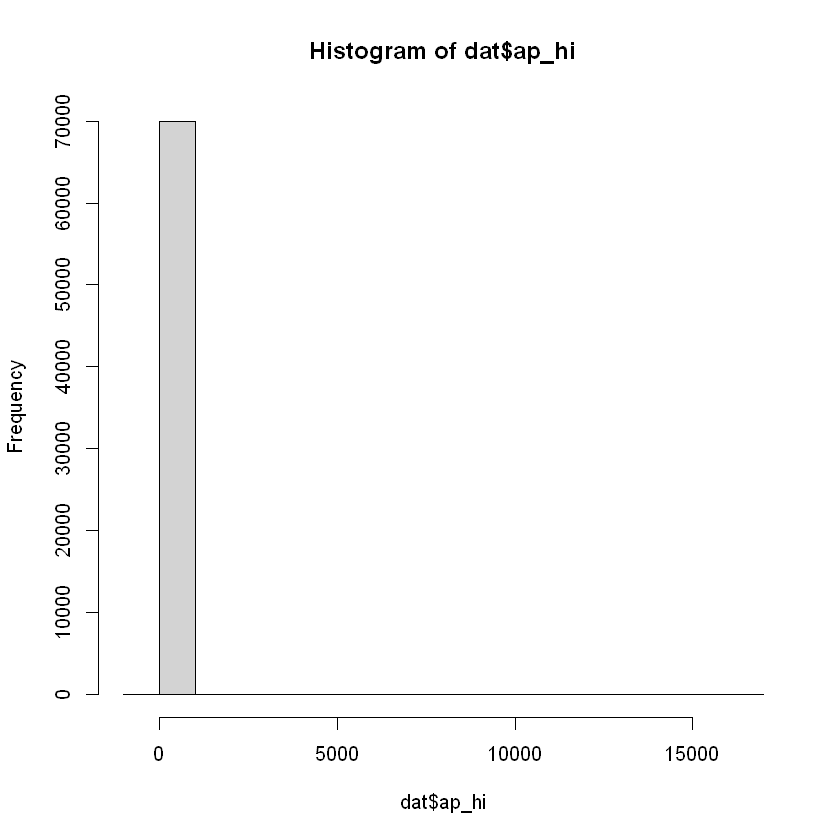

In [10]:
hist(dat$ap_hi)

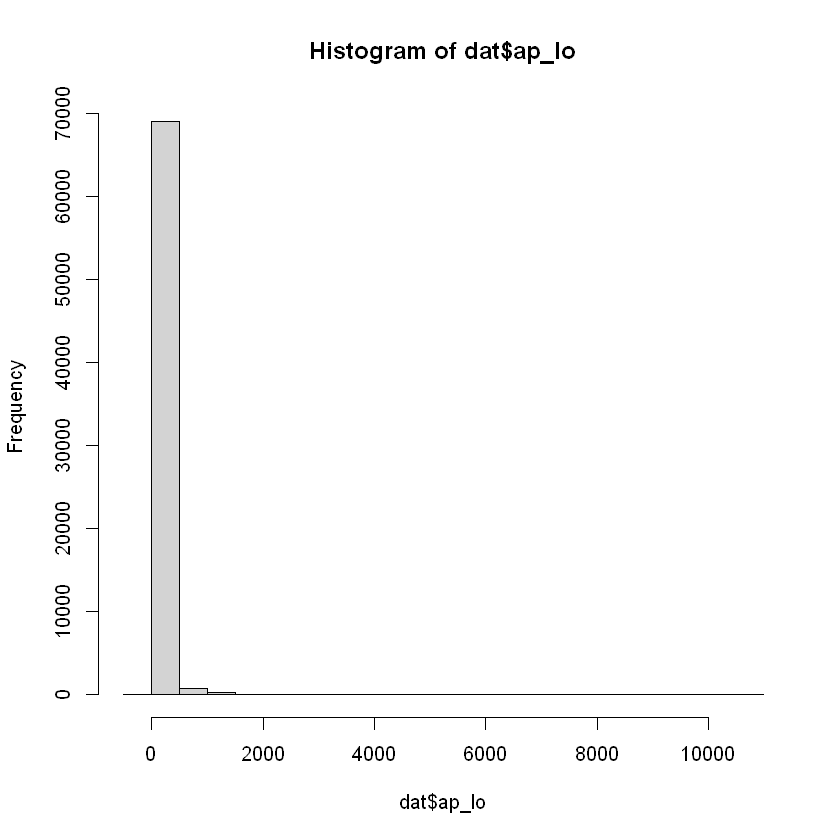

In [11]:
hist(dat$ap_lo)

In [12]:
print(mean(dat$ap_hi))
print(sd(dat$ap_hi))

[1] 128.8173
[1] 154.0114


In [13]:
print(mean(dat$ap_lo))
print(sd(dat$ap_lo))

[1] 96.63041
[1] 188.4725


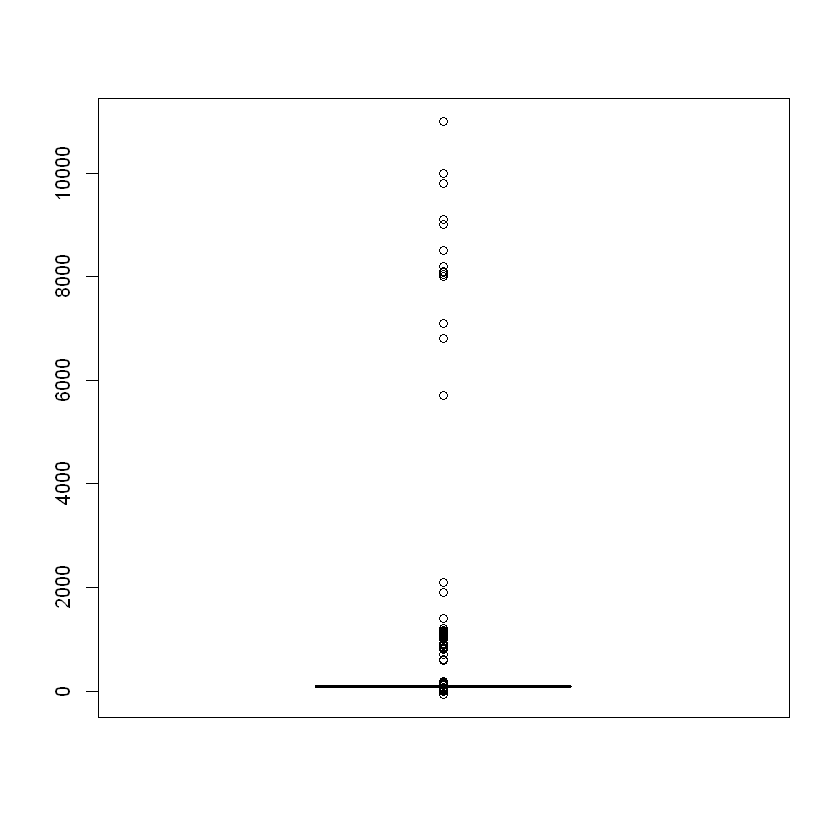

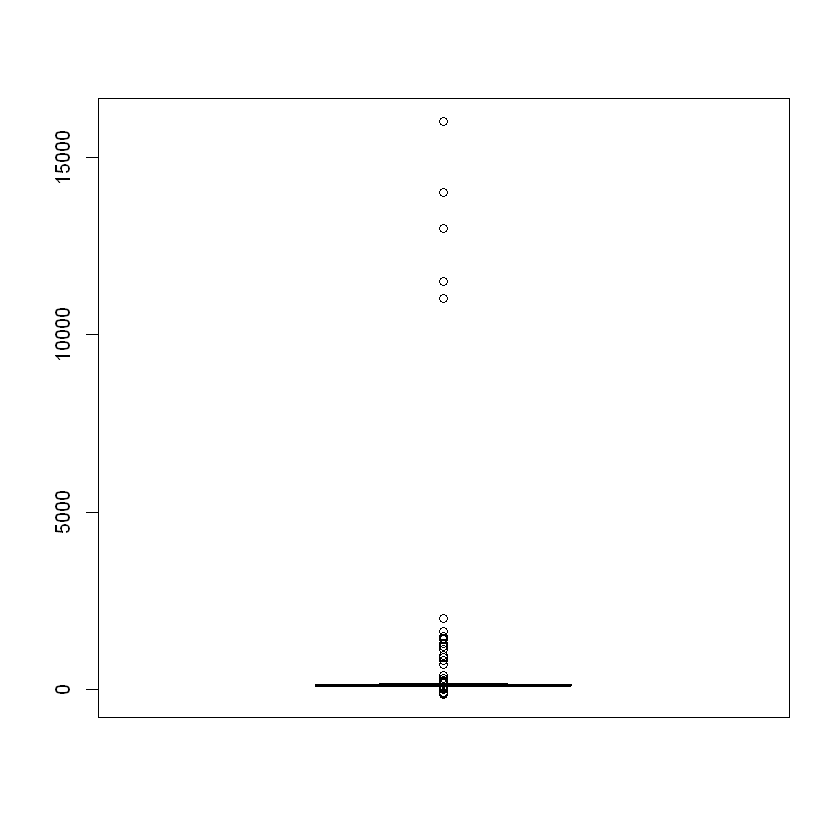

In [14]:
box_lo<-boxplot(dat$ap_lo)
box_hi<-boxplot(dat$ap_hi)

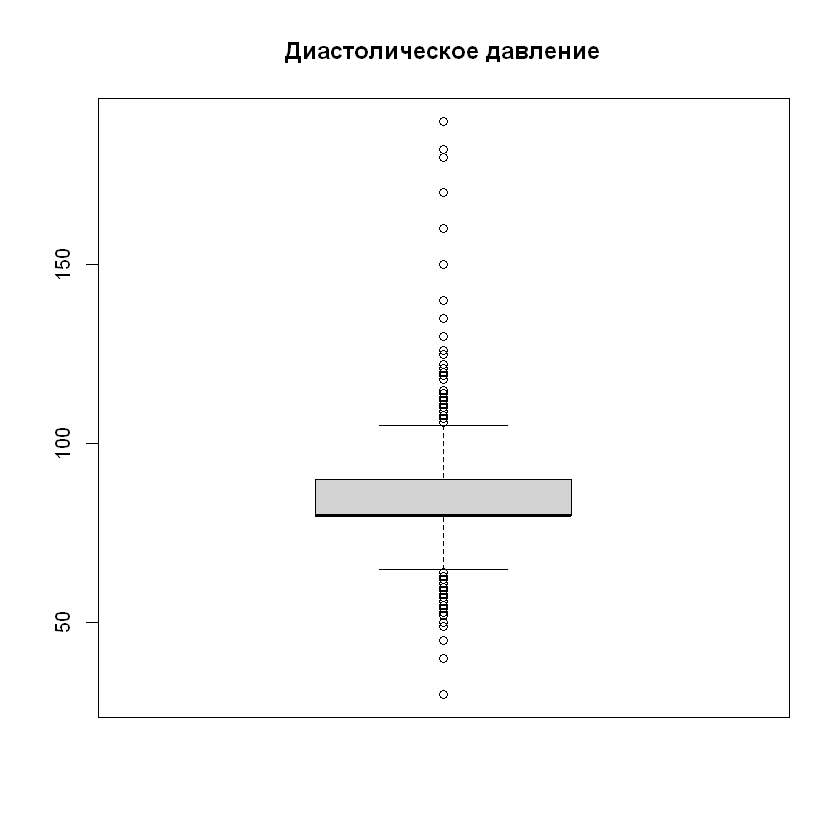

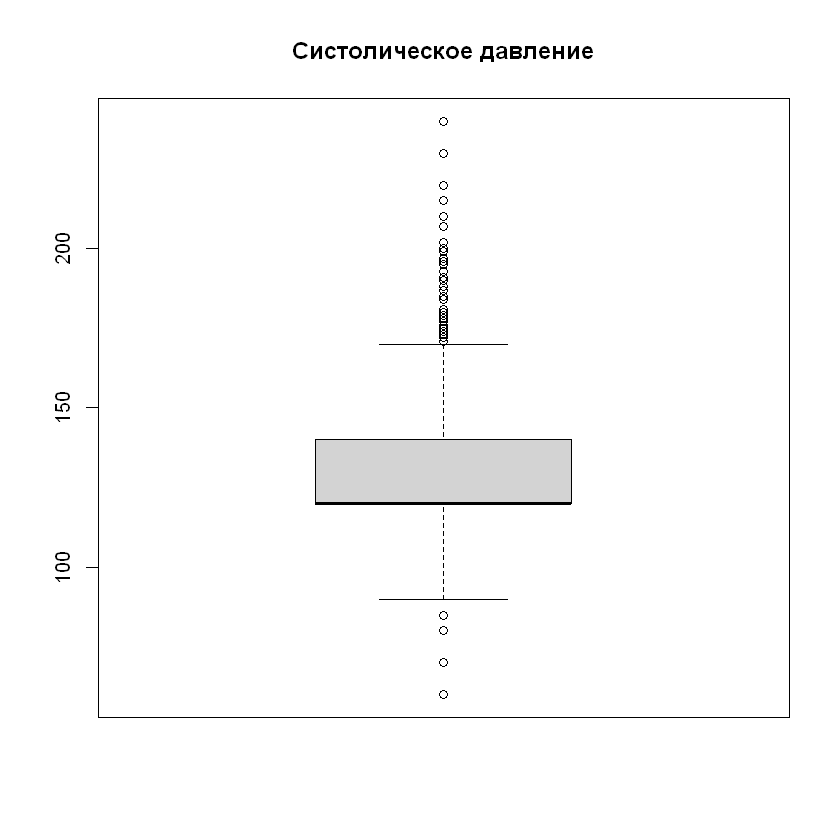

In [15]:
box_lo<-boxplot(dat$ap_lo[dat$ap_lo<200 & dat$ap_lo>20])
title("Диастолическое давление")
box_hi<-boxplot(dat$ap_hi[dat$ap_hi<300 & dat$ap_hi>40])
title("Систолическое давление")

In [16]:
min(dat$ap_hi[dat$ap_hi<300 & dat$ap_hi>40])

[1] 60

In [17]:
min(dat$ap_hi)

[1] -150

In [18]:
dat$ap_hi[dat$ap_hi<0]

[1] -100 -115 -100 -140 -120 -150 -120

In [19]:
print(median(dat$ap_lo[dat$ap_lo<200 & dat$ap_lo>20]))
print(quantile(dat$ap_lo[dat$ap_lo<200 & dat$ap_lo>20]),0.25)

[1] 80
  0%  25%  50%  75% 100% 
  30   80   80   90  190 


In [20]:
sort(dat$ap_lo[dat$ap_lo<200 & dat$ap_lo>20])

[1]  30  30  30  30  30  30  40  40  40  40  40  40  40  40  40  40  40  40
   [19]  40  40  40  40  40  45  45  49  49  50  50  50  50  50  50  50  50  50
   [37]  50  50  50  50  50  50  50  50  50  50  50  50  50  50  50  50  50  50
   [55]  50  50  50  50  50  50  50  50  50  50  50  50  50  50  50  50  50  50
   [73]  50  50  50  50  50  50  50  50  50  50  50  52  52  53  53  53  54  55
   [91]  55  55  55  56  57  57  57  57  58  58  58  58  59  59  59  59  59  59
  [109]  59  59  59  59  59  59  59  59  59  59  59  59  59  59  60  60  60  60
  [127]  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60
  [145]  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60
  [163]  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60
  [181]  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60
  [199]  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60
  [217]  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60
  [235]  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60
  [253]  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60
  [271]  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60
  [289]  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60
  [307]  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60
  [325]  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60
  [343]  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60
  [361]  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60
  [379]  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60
  [397]  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60
  [415]  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60
  [433]  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60
  [451]  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60
  [469]  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60
  [487]  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60
  [505]  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60
  [523]  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60
  [541]  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60
  [559]  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60
  [577]  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60
  [595]  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60
  [613]  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60
  [631]  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60
  [649]  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60
  [667]  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60
  [685]  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60
  [703]  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60
  [721]  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60
  [739]  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60
  [757]  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60
  [775]  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60
  [793]  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60
  [811]  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60
  [829]  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60
  [847]  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60
  [865]  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60
  [883]  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60
  [9

In [21]:
length(dat$ap_lo[dat$ap_lo<200 & dat$ap_lo>20])

[1] 68994

In [22]:
68994*25/100

[1] 17248.5

In [23]:
ind_p25<-trunc(68994*25/100)+1
ind_p25

[1] 17249

In [24]:
sort(dat$ap_lo[dat$ap_lo<200 & dat$ap_lo>20])[ind_p25]

[1] 80

In [25]:
sort(dat$ap_lo[dat$ap_lo<200 & dat$ap_lo>20])[c(34497,34498)]

[1] 80 80

In [26]:
sort(dat$ap_lo[dat$ap_lo<200 & dat$ap_lo>20])[c(17249:34498)]

[1] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
   [25] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
   [49] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
   [73] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
   [97] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [121] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [145] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [169] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [193] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [217] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [241] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [265] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [289] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [313] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [337] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [361] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [385] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [409] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [433] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [457] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [481] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [505] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [529] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [553] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [577] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [601] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [625] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [649] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [673] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [697] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [721] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [745] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [769] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [793] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [817] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [841] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [865] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [889] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [913] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [937] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [961] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [985] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
 [1009] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
 [1033] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
 [1057] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
 [1081] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
 [1105] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
 [1129] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
 [1153] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
 [1177] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
 [12

In [27]:
tail(sort(dat$ap_lo[dat$ap_lo<200 & dat$ap_lo>20])[c(17249:34498)],20)

[1] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80

In [28]:
tidy_set<-dat %>% filter((ap_lo<200&ap_lo>20) & (ap_hi<300&ap_hi>40))
head(tidy_set)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,0,18393,2,168,62,110,80,1,1,0,0,1,0,50
2,1,20228,1,156,85,140,90,3,1,0,0,1,1,55
3,2,18857,1,165,64,130,70,3,1,0,0,0,1,51
4,3,17623,2,169,82,150,100,1,1,0,0,1,1,48
5,4,17474,1,156,56,100,60,1,1,0,0,0,0,47
6,8,21914,1,151,67,120,80,2,2,0,0,0,0,60


In [29]:
print(dim(dat))
print(dim(tidy_set))
print(nrow(dat))
print(ncol(dat))

[1] 70000    14
[1] 68781    14
[1] 70000
[1] 14


In [30]:
# Верхнее давление
print(mean(tidy_set$ap_hi))
print(mean(dat$ap_hi))
print(sd(tidy_set$ap_hi))
print(sd(dat$ap_hi))

[1] 126.6153
[1] 128.8173
[1] 16.76354
[1] 154.0114


In [31]:
# Нижнее давление
print(mean(tidy_set$ap_lo))
print(mean(dat$ap_lo))
print(sd(tidy_set$ap_lo))
print(sd(dat$ap_lo))

[1] 81.37756
[1] 96.63041
[1] 9.688359
[1] 188.4725


In [32]:
mypar(2,2)

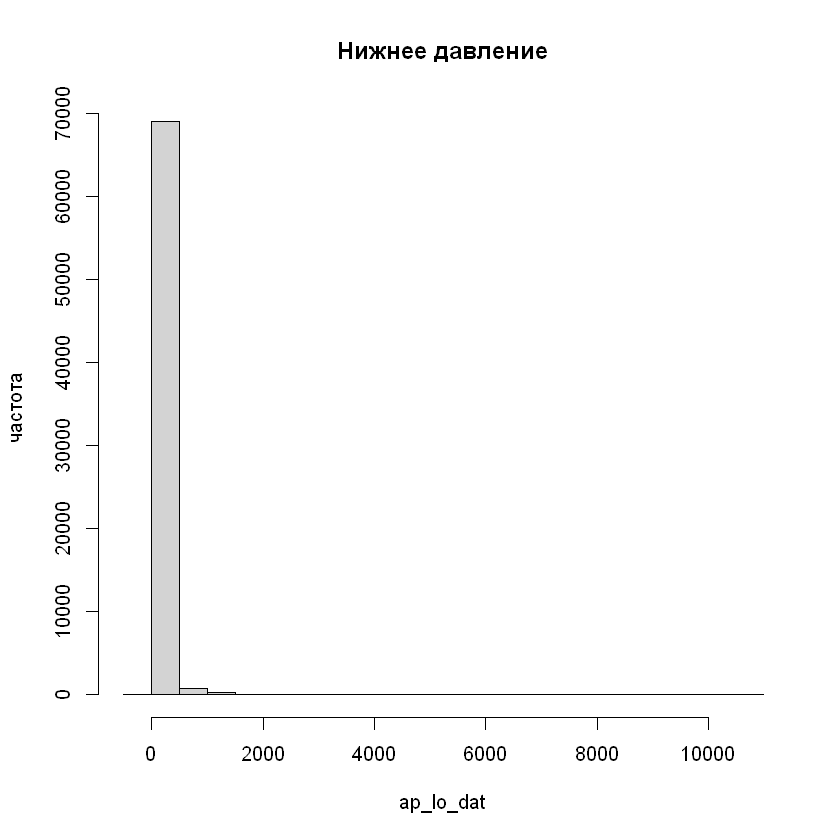

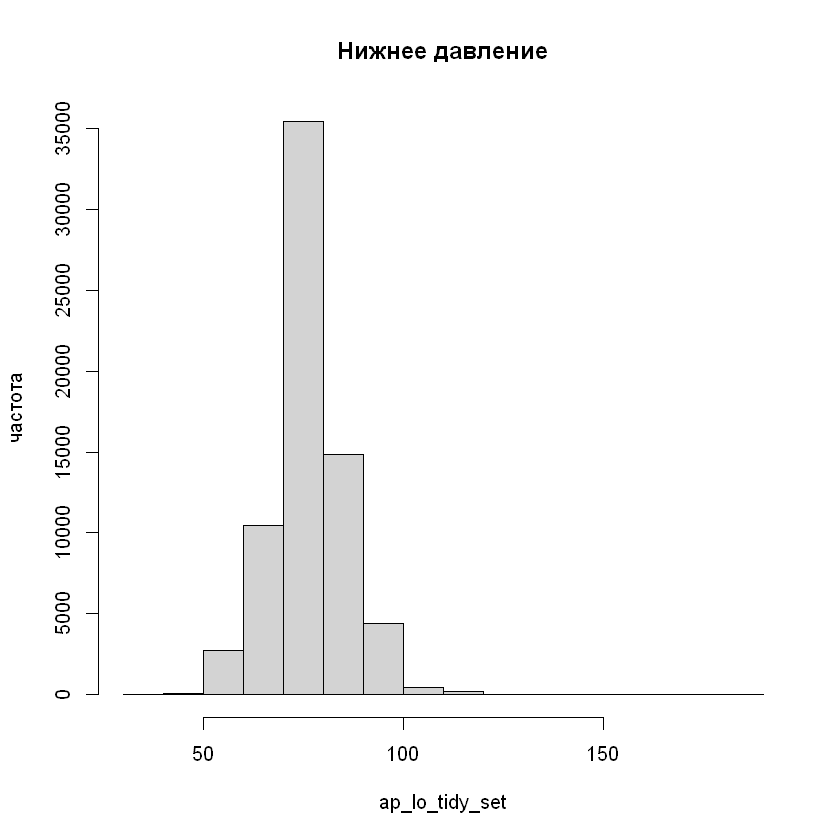

In [33]:
hist(dat$ap_lo, main = "Нижнее давление", xlab = "ap_lo_dat", ylab = "частота")
hist(tidy_set$ap_lo, main = "Нижнее давление", xlab = "ap_lo_tidy_set", ylab = "частота")

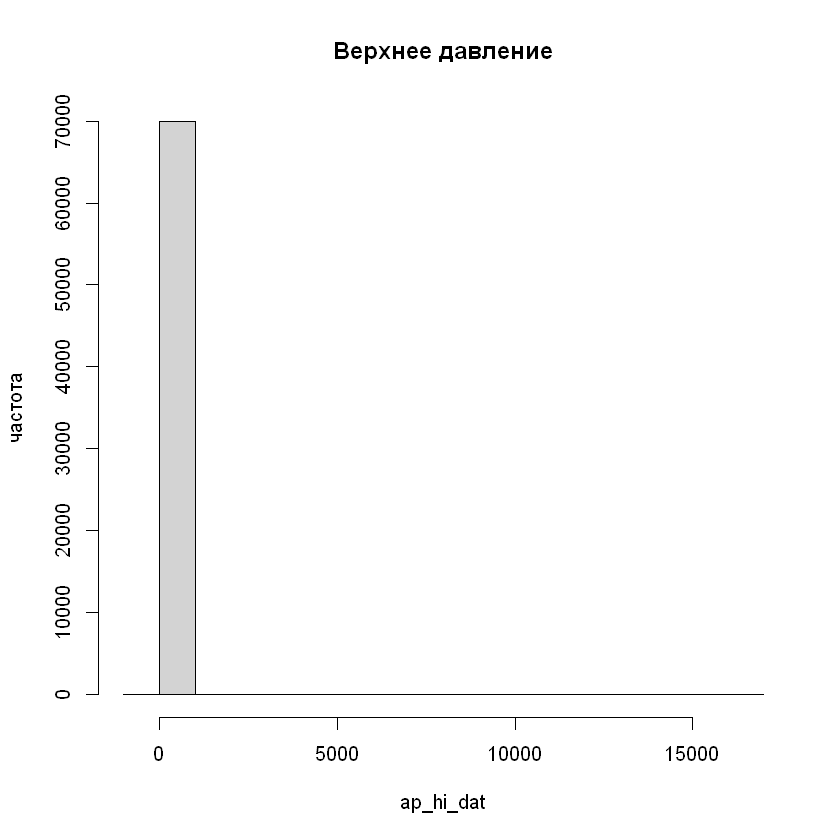

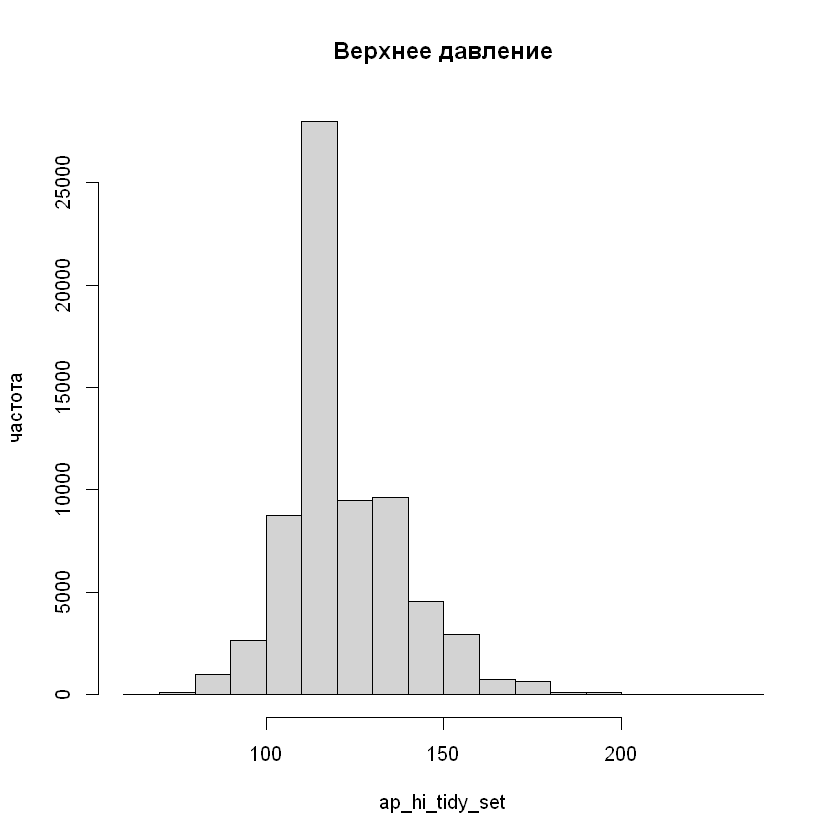

In [34]:
hist(dat$ap_hi, main = "Верхнее давление", xlab = "ap_hi_dat", ylab = "частота")
hist(tidy_set$ap_hi, main = "Верхнее давление", xlab = "ap_hi_tidy_set", ylab = "частота")

In [35]:
mypar(1,2)

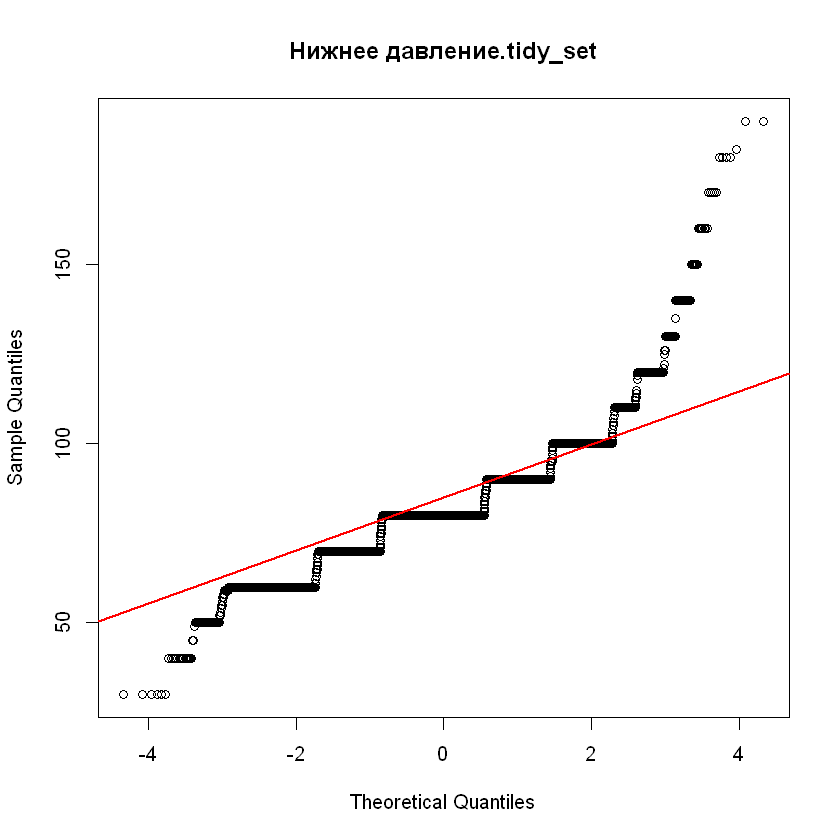

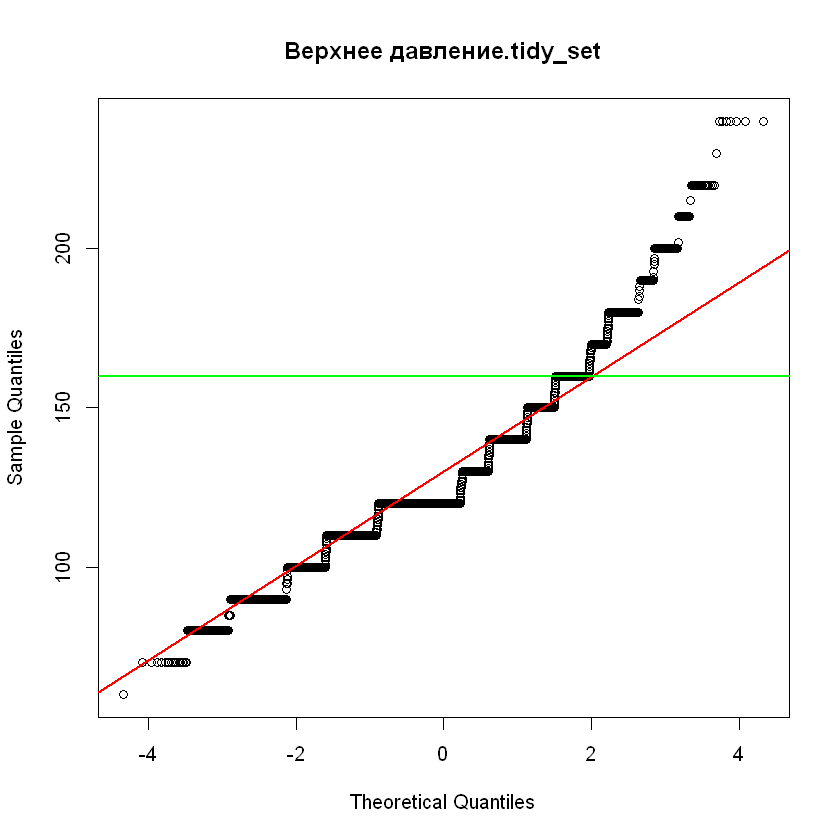

In [36]:
qqnorm(tidy_set$ap_lo, main = "Нижнее давление.tidy_set")
qqline(tidy_set$ap_lo, col="red", lwd=2)
qqnorm(tidy_set$ap_hi, main = "Верхнее давление.tidy_set")
qqline(tidy_set$ap_hi, col="red", lwd=2)
abline(h = 160, col="green",lwd=2)

List of 2
 $ 1: int [1:44795] 90 70 60 80 80 70 60 80 70 70 ...
 $ 2: int [1:23986] 80 100 90 80 80 90 80 70 80 60 ...


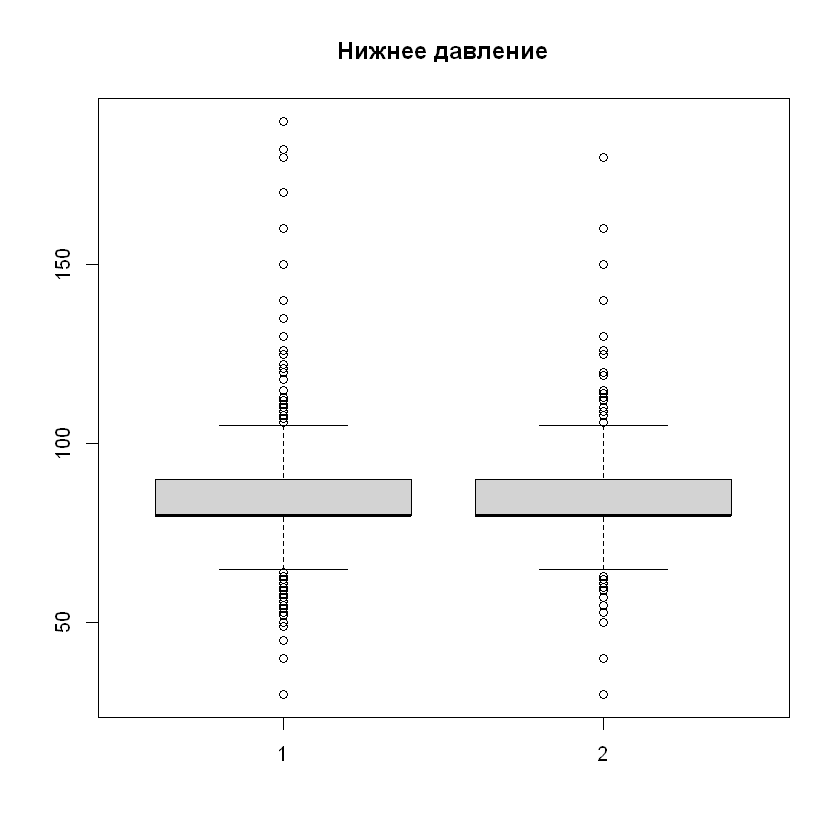

In [38]:
groups_lo<-split(tidy_set$ap_lo,tidy_set$gender)
str(groups_lo)
boxplot(groups_lo)
title("Нижнее давление")

List of 2
 $ 1: int [1:44795] 140 130 100 120 130 110 110 120 110 130 ...
 $ 2: int [1:23986] 110 150 130 120 120 130 120 120 120 110 ...


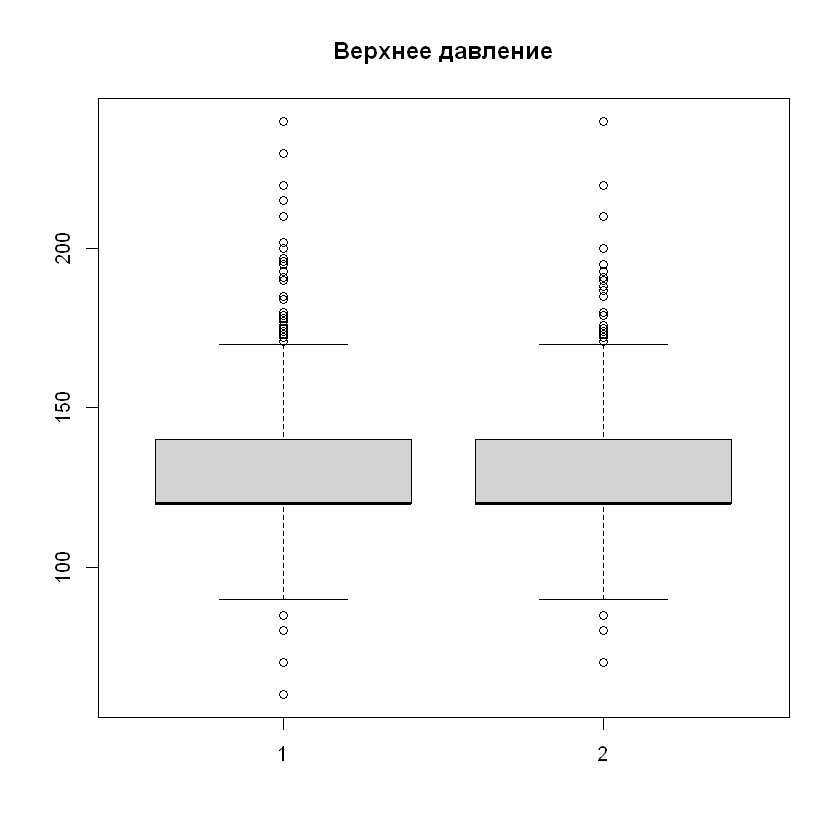

In [39]:
groups_hi<-split(tidy_set$ap_hi,tidy_set$gender)
str(groups_hi)
boxplot(groups_hi)
title("Верхнее давление")

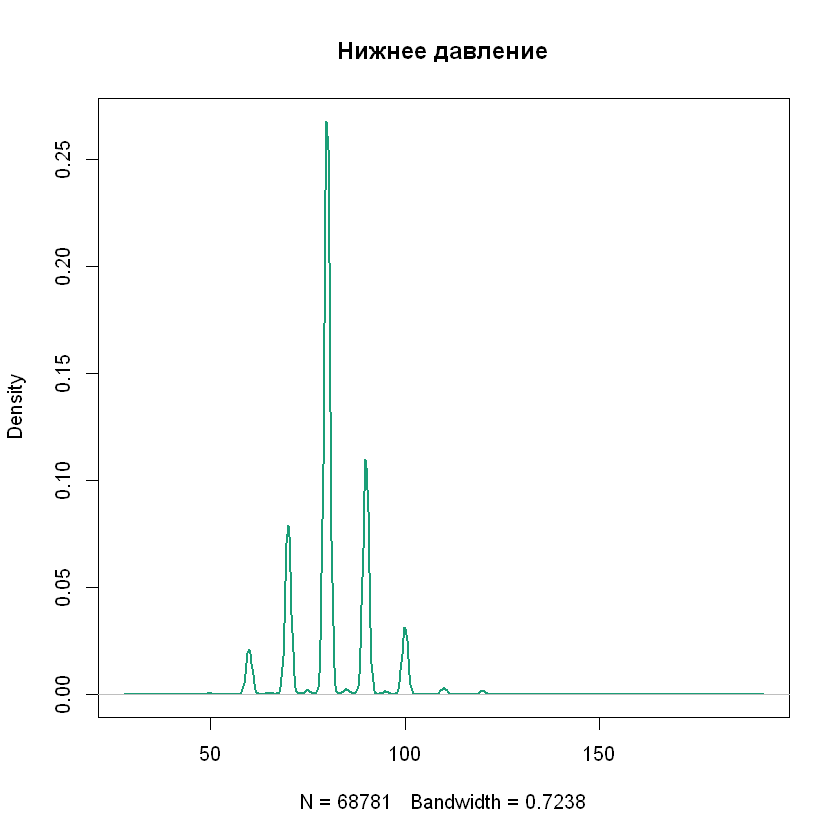

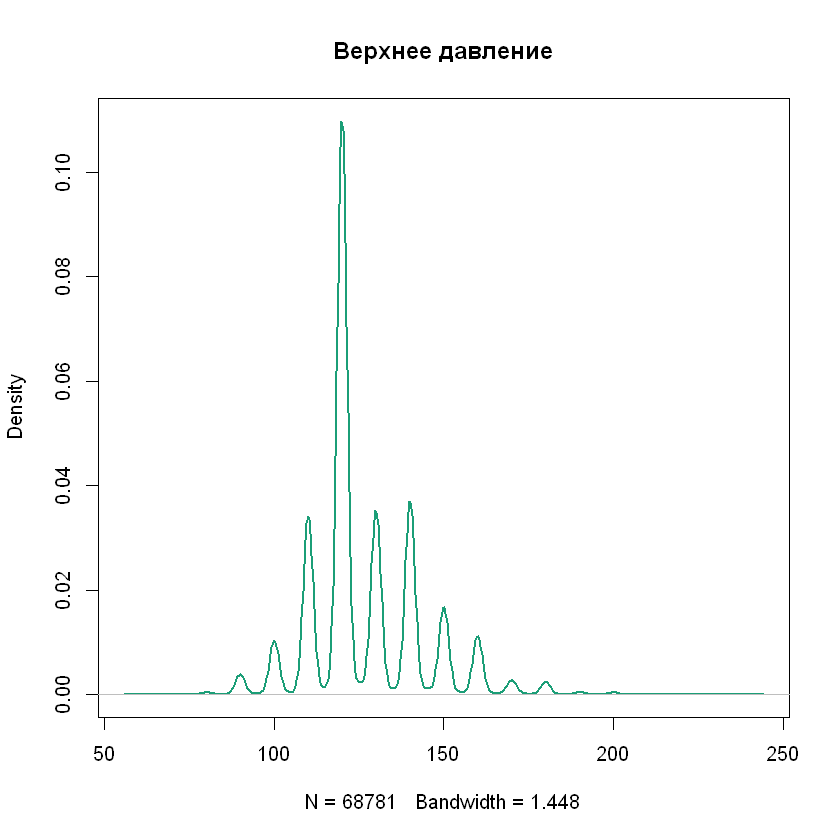

In [40]:
plot(density(tidy_set$ap_lo),col = 1,lwd = 2,main = "Нижнее давление")
plot(density(tidy_set$ap_hi),col = 1,lwd = 2,main = "Верхнее давление")

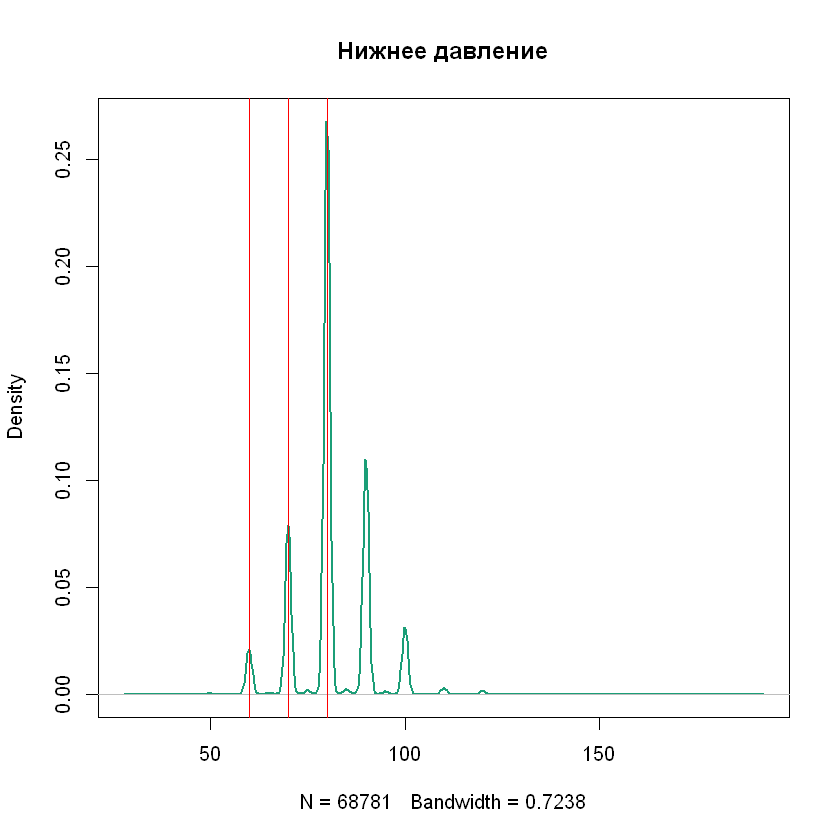

In [42]:
plot(density(tidy_set$ap_lo),col = 1,lwd = 2,main = "Нижнее давление")
abline(v = 60, col="red")
abline(v = 70, col="red")
abline(v = 80, col="red")

In [44]:
sort_lo<-sort(tidy_set$ap_lo)

In [45]:
cut_1<-sort_lo[sort_lo>65&sort_lo<75]
tail(cut_1,20)

[1] 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74

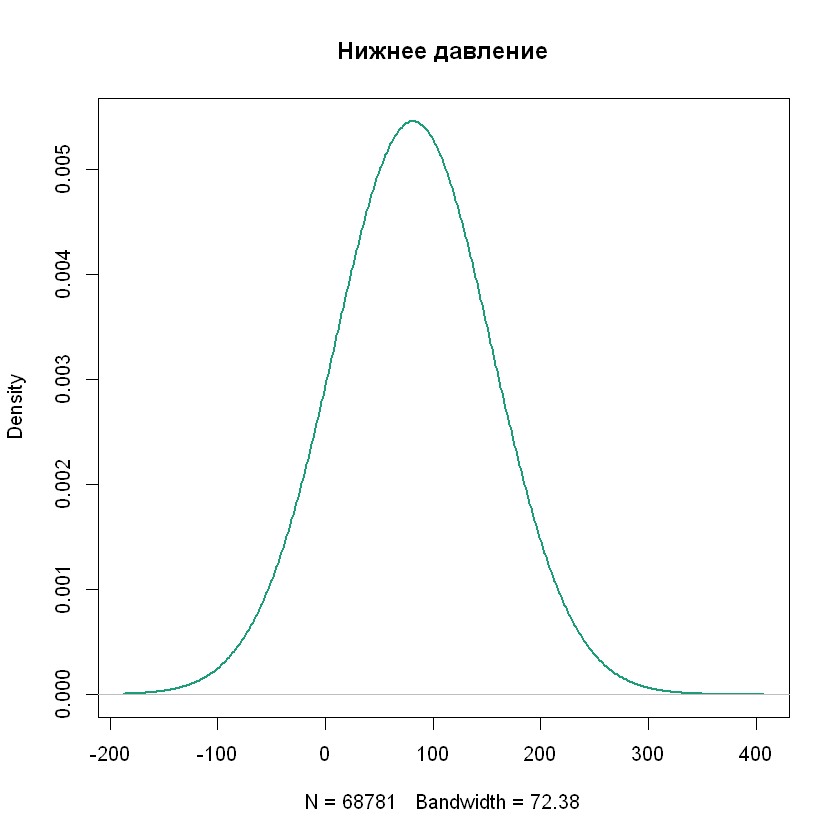

In [46]:
plot(density(tidy_set$ap_lo,adjust = 100),col = 1,lwd = 2,main = "Нижнее давление")

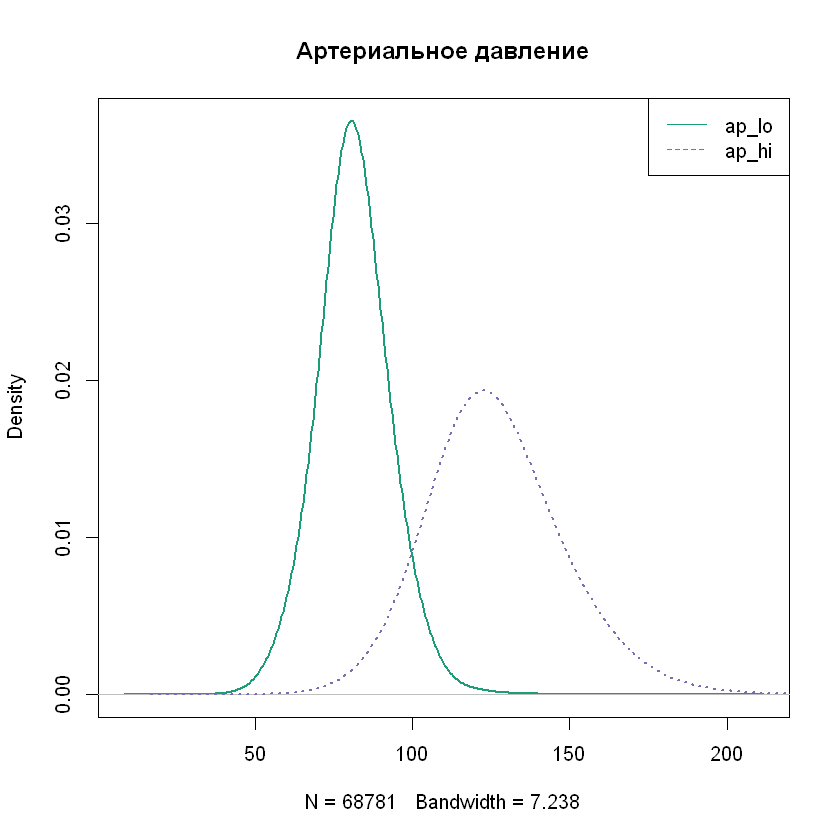

In [50]:
plot(density(tidy_set$ap_lo,adjust = 10),col = 1,lwd = 2,main = "Артериальное давление")
lines(density(tidy_set$ap_hi,adjust = 10),col = 3,lwd = 2,lty = 3)
legend("topright",c('ap_lo','ap_hi'),col = c(1,3), lty = c(1,2))

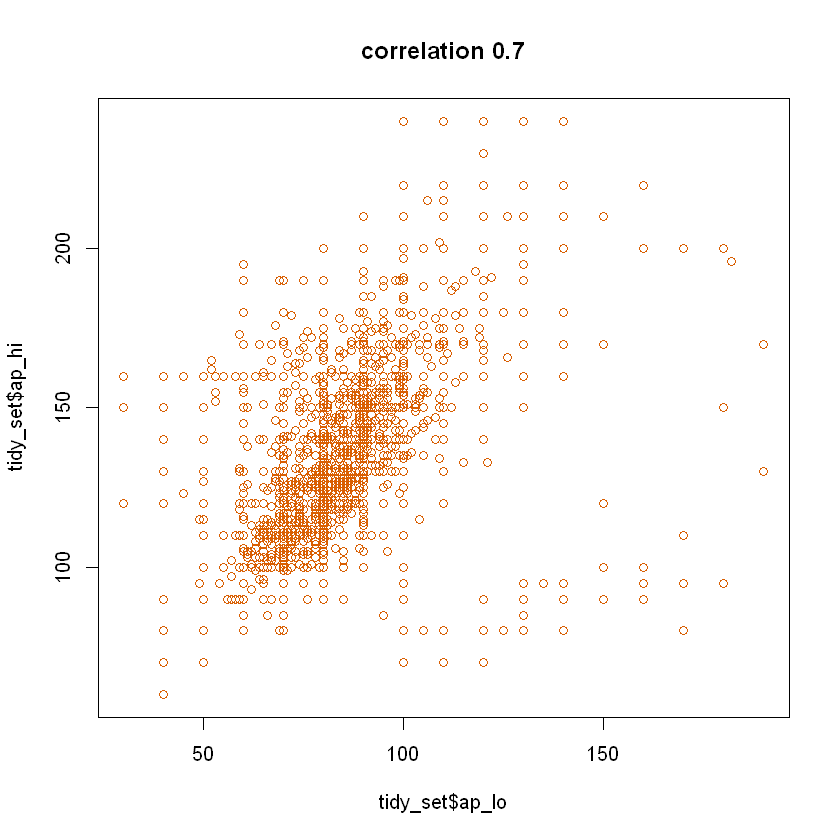

In [52]:
plot(tidy_set$ap_lo,tidy_set$ap_hi,col = 2,main = paste("correlation",signif(cor(tidy_set$ap_lo,tidy_set$ap_hi),2)))

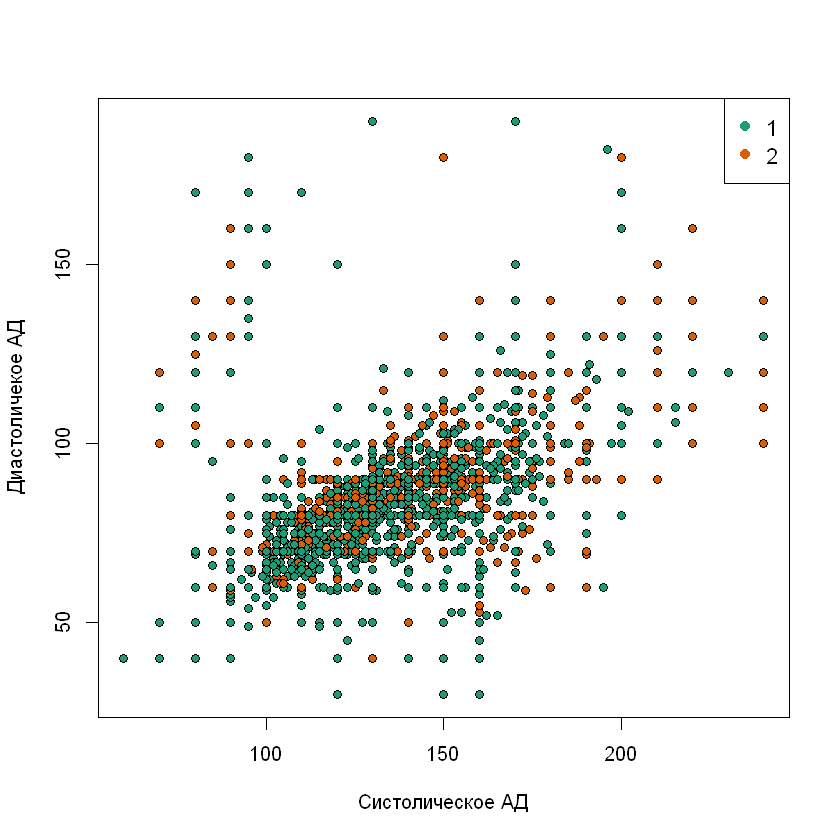

In [56]:
plot(tidy_set$ap_hi,tidy_set$ap_lo,pch = 21,
     bg=as.numeric(factor(tidy_set$gender)),xlab="Систолическое АД", ylab="Диастоличекое АД")
legend("topright", levels(factor(tidy_set$gender)),col = seq(along = levels(factor(tidy_set$gender))),pch = 19,cex = 1.1)

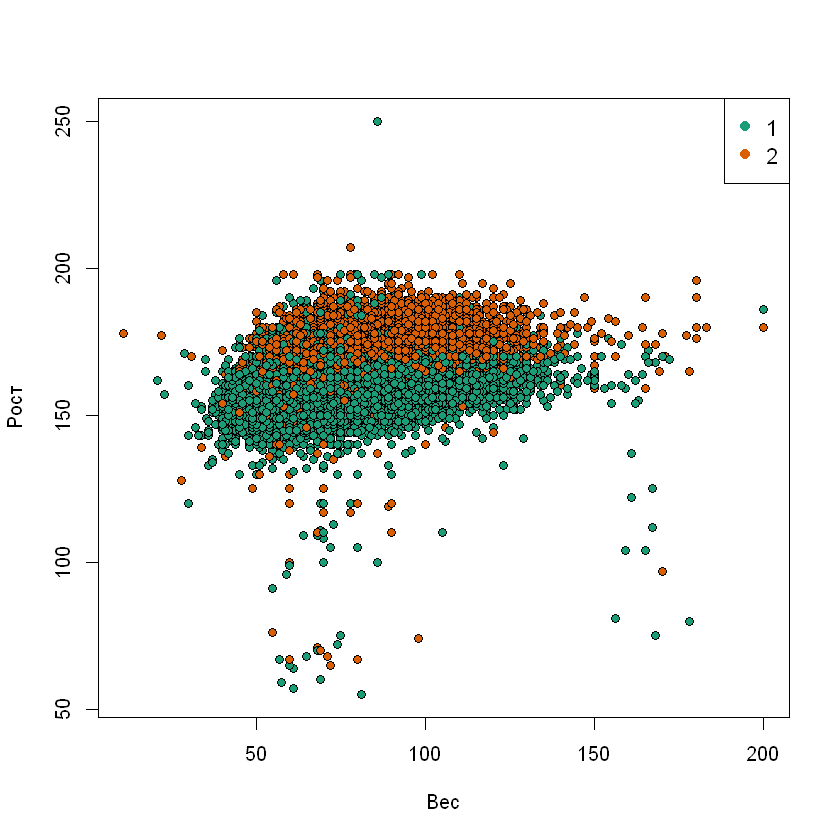

In [57]:
plot(tidy_set$weight,tidy_set$height,pch = 21,
     bg=as.numeric(factor(tidy_set$gender)),xlab="Вес", ylab="Рост")
legend("topright", levels(factor(tidy_set$gender)),col = seq(along = levels(factor(tidy_set$gender))),pch = 19,cex = 1.1)

In [59]:
miniset<-tidy_set[,3:5]
head(miniset)

,gender,height,weight
,<int>,<int>,<dbl>
1,2,168,62
2,1,156,85
3,1,165,64
4,2,169,82
5,1,156,56
6,1,151,67


In [60]:
nrow(miniset)

[1] 68781

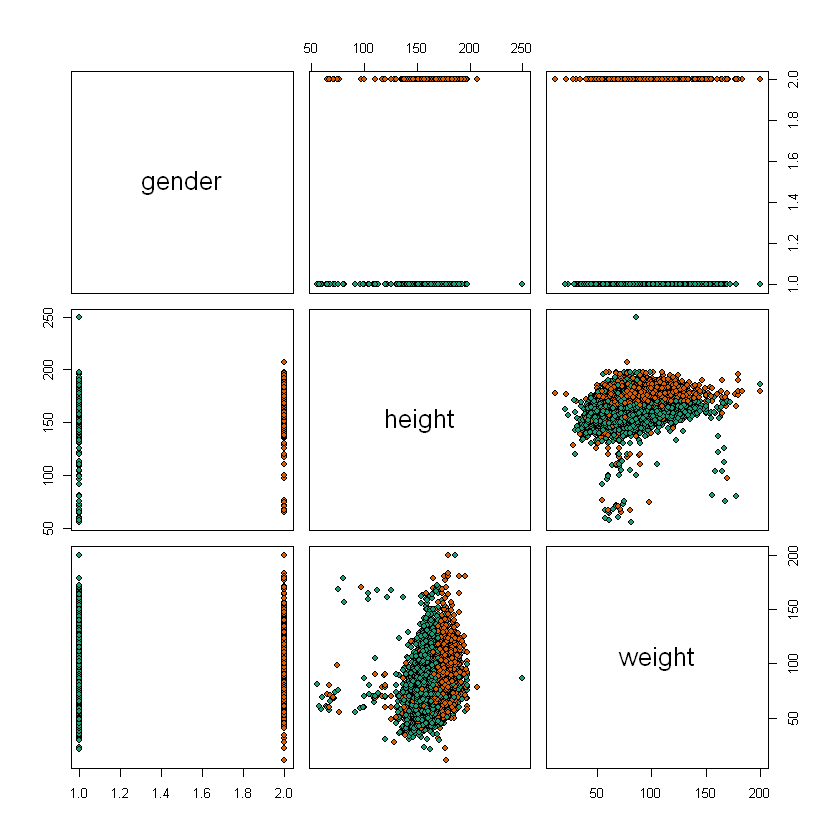

In [61]:
plot(miniset,pch = 21,bg=miniset$gender)

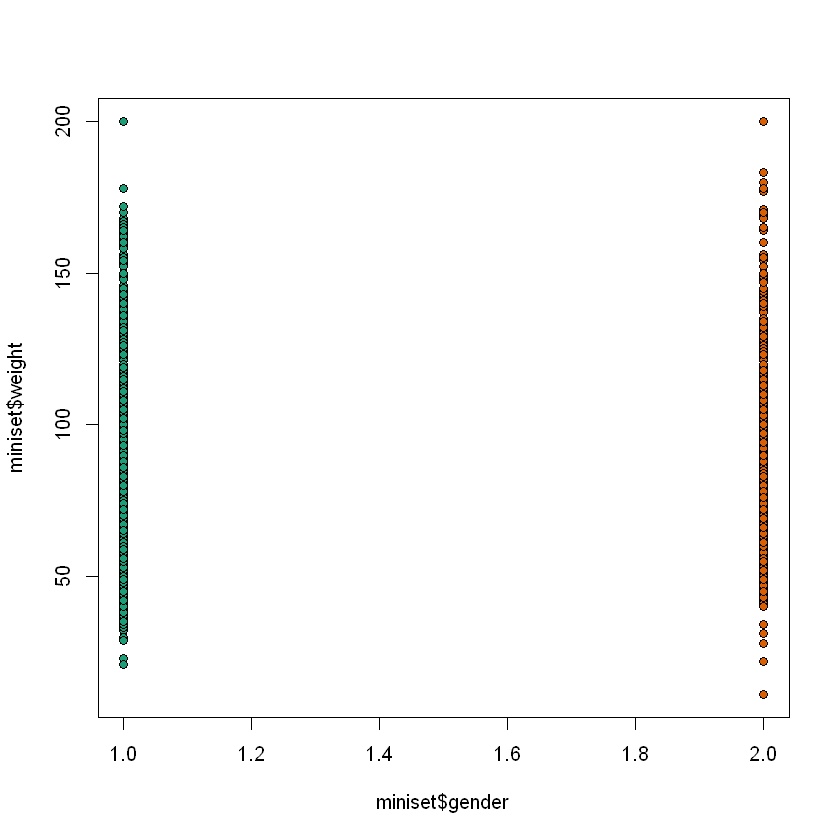

In [62]:
plot(miniset$gender,miniset$weight,pch = 21,bg=miniset$gender)